In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from colour import Color

maximum = 25              #Number of maximum bingo size(Not recommand edit this)
activation = 0            #Activated bingo count(You shoud edit this value)
try_count = 5000          #Bingo simulation try count(The higher the value, the higher the accuracy, but the slower the processing speed.)
expend = 30               #Batteries consumed per bingo
try_data = []
bingo_board = []

In [3]:
#활성화된 수 만큼 빙고칸 채우기
while len(bingo_board)  < activation:
    num = random.randint(1, maximum)
    if not num in bingo_board:
        bingo_board.append(num)
    #end if
#end while

In [4]:
#채워진 빙고칸은 저장
board_temp = bingo_board.copy()

for i in range(try_count):
    tc = 0
    bingo_board = board_temp.copy()
    
    #님은 빙고칸 다 채우기
    while len(bingo_board) < maximum:
        num = random.randint(1, maximum)
        
        #숫자가 중복되지 않으면 값 추가
        if not num in bingo_board:
            bingo_board.append(num)
        #end if
        
        #카운트 증가
        tc += 1
    #end while
    try_data.append(tc)
#end for

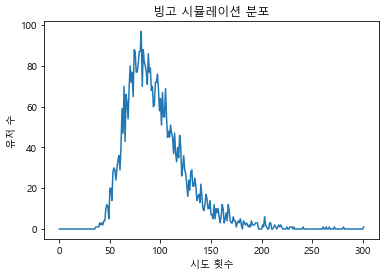

In [5]:
#전체 밀도 추출

density_data = []
x_ticks = []
sampling_size = 1
try_data_max = try_data[np.argmax(try_data)]
sampling_count = (int(try_data_max / sampling_size) + int(try_data_max % sampling_size == 0))

for i in range(sampling_count):
    from_size = i * sampling_size
    to_size = (sampling_size - 1) + (sampling_size * (i))
    x_ticks.append(from_size)
    density = 0
    
    for j in range(len(try_data)):
        if from_size <= try_data[j] and try_data[j] <= to_size:
            density += 1
        #end for
    #end for
    
    density_data.append(density)
#end for

#density_data = resize_ary(density_data, try_data_max)
plt.rc('font', family='Malgun Gothic')
plt.title("빙고 시뮬레이션 분포")
plt.xlabel("시도 횟수")
plt.ylabel("유저 수")
plt.plot(density_data)
plt.show()

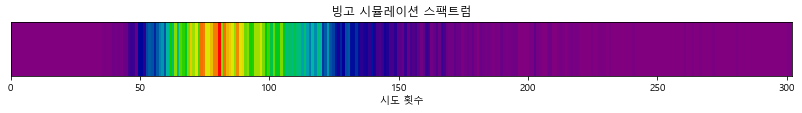

평균:95
소모:2850


In [6]:
density_max = density_data[np.argmax(density_data)]
color_gradients = list(Color("purple").range_to(Color("red"), density_max + 1))

plt.figure(figsize=(14, 1))
plt.rc('font', family='Malgun Gothic')
plt.title("빙고 시뮬레이션 스팩트럼")
plt.yticks([])
plt.xlim((0, len(density_data)))
plt.xlabel("시도 횟수")

for i in range(len(density_data)):
    plt.axvline(i, linewidth=5, color=str(color_gradients[density_data[i]]))
plt.show()

average = round(np.average(try_data))
print("빙고횟수 평균 :" + str(average))
print("평균 소모 건전지:" + str(average * expend))